This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 4s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 1s 1us/step


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [10]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5171 - accuracy: 0.7864 - val_loss: 0.3843 - val_accuracy: 0.8688
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3174 - accuracy: 0.8938 - val_loss: 0.3286 - val_accuracy: 0.8681
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2399 - accuracy: 0.9173 - val_loss: 0.2814 - val_accuracy: 0.8893
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1937 - accuracy: 0.9344 - val_loss: 0.2751 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1625 - accuracy: 0.9463 - val_loss: 0.2775 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1391 - accuracy: 0.9535 - val_loss: 0.2913 - val_accuracy: 0.8822
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1186 - accuracy: 0.9629 - val_loss: 0.3005 - val_accuracy: 0.8839
Epoch 8/20
30

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

In [22]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

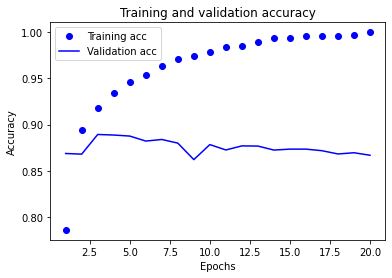

In [15]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4572 - accuracy: 0.8142
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2673 - accuracy: 0.9047
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2127 - accuracy: 0.9230
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2944 - accuracy: 0.8822


In [17]:
results

[0.2943558096885681, 0.8821600079536438]

### Using a trained model to generate predictions on new data

In [18]:
model.predict(x_test)

782/782 [==============================] - 1s 989us/step


array([[0.16338505],
       [0.9996417 ],
       [0.75916195],
       ...,
       [0.06943345],
       [0.06815748],
       [0.47449434]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 1s 2us/step


In [6]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [7]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [11]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [12]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels) # 实现one-hot编码的接口
y_test = to_categorical(test_labels)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Building your model

**Model definition**

In [17]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax") # 输出每个样本的46维向量概率分布，每个维度代表一个类别
])

**Compiling the model**

In [18]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", # 分类交叉熵
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [19]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 28ms/step - loss: 2.7519 - accuracy: 0.5083 - val_loss: 1.8273 - val_accuracy: 0.6320
Epoch 2/20
16/16 [==============================] - 0s 22ms/step - loss: 1.5284 - accuracy: 0.6818 - val_loss: 1.3648 - val_accuracy: 0.6970
Epoch 3/20
16/16 [==============================] - 0s 23ms/step - loss: 1.1695 - accuracy: 0.7466 - val_loss: 1.1844 - val_accuracy: 0.7290
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 0.9544 - accuracy: 0.7938 - val_loss: 1.1245 - val_accuracy: 0.7400
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.7992 - accuracy: 0.8272 - val_loss: 1.0386 - val_accuracy: 0.7840
Epoch 6/20
16/16 [==============================] - 0s 20ms/step - loss: 0.6653 - accuracy: 0.8591 - val_loss: 0.9558 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 0.5573 - accuracy: 0.8810 - val_loss: 0.9257 - val_accuracy: 0.8080
Epoch 8/20
16

**Plotting the training and validation loss**

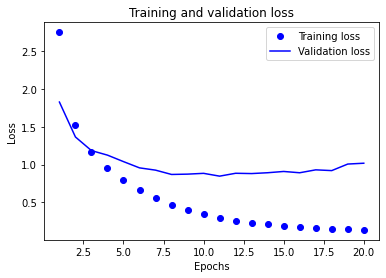

In [23]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

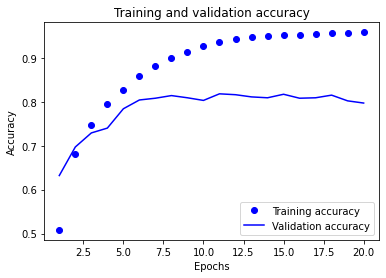

In [24]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [25]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 16ms/step - loss: 2.6562 - accuracy: 0.4973
Epoch 2/9
18/18 [==============================] - 0s 17ms/step - loss: 1.5307 - accuracy: 0.6906
Epoch 3/9
18/18 [==============================] - 0s 17ms/step - loss: 1.1715 - accuracy: 0.7524
Epoch 4/9
18/18 [==============================] - 0s 17ms/step - loss: 0.9508 - accuracy: 0.7990
Epoch 5/9
18/18 [==============================] - 0s 17ms/step - loss: 0.7799 - accuracy: 0.8353
Epoch 6/9
18/18 [==============================] - 0s 17ms/step - loss: 0.6462 - accuracy: 0.8642
Epoch 7/9
18/18 [==============================] - 0s 19ms/step - loss: 0.5392 - accuracy: 0.8869
Epoch 8/9
18/18 [==============================] - 0s 20ms/step - loss: 0.4513 - accuracy: 0.9068
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9185 - accuracy: 0.8019


In [26]:
results

[0.9185470342636108, 0.8018699884414673]

In [27]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.20525378450578807

### Generating predictions on new data

In [28]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 1ms/step


In [32]:
predictions[0].shape

(46,)

In [33]:
np.sum(predictions[0])

1.0000002

In [35]:
np.argmax(predictions[0]) # argmax返回最大值的索引，即概率最高的类别

3

### A different way to handle the labels and the loss

In [36]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [37]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [38]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 2.8734 - accuracy: 0.3418 - val_loss: 2.2741 - val_accuracy: 0.3920
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 2.0042 - accuracy: 0.4280 - val_loss: 1.8252 - val_accuracy: 0.4350
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 1.5201 - accuracy: 0.5838 - val_loss: 1.4366 - val_accuracy: 0.6480
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 1.2319 - accuracy: 0.6749 - val_loss: 1.3437 - val_accuracy: 0.6490
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 1.0962 - accuracy: 0.6996 - val_loss: 1.2832 - val_accuracy: 0.6840
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 0.9914 - accuracy: 0.7407 - val_loss: 1.2540 - val_accuracy: 0.6980
Epoch 7/20
63/63 [==============================] - 1s 8ms/step - loss: 0.9089 - accuracy: 0.7697 - val_loss: 1.2649 - val_accuracy: 0.6980
Epoch 8/20
63/63 [=

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [39]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 4us/step


In [40]:
train_data.shape

(404, 13)

In [41]:
test_data.shape

(102, 13)

In [42]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [43]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [44]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [45]:
k = 4 # k折交叉验证
num_val_samples = len(train_data) // k
num_epochs = 100 # 迭代次数
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] # 第k份数据作为验证集
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model() # 构建Keras模型（已编译）
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0) # verbose=0表示静默模式
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) # 在验证数据上评估模型
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [46]:
all_scores

[2.016552686691284, 2.673933267593384, 2.420926332473755, 2.535749912261963]

In [47]:
np.mean(all_scores)

2.4117905497550964

**Saving the validation logs at each fold**

In [48]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"] # 记录每个epoch的MAE
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [49]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [51]:
average_mae_history

[19.295490264892578,
 15.853994131088257,
 11.89021372795105,
 8.361608147621155,
 6.303945779800415,
 5.163391828536987,
 4.43255889415741,
 4.005971968173981,
 3.7766467928886414,
 3.565980017185211,
 3.362719416618347,
 3.2253950238227844,
 3.2071533799171448,
 3.0940719842910767,
 3.0505321621894836,
 2.925364315509796,
 2.8800783157348633,
 2.8516711592674255,
 2.853900909423828,
 2.8049152493476868,
 2.723151922225952,
 2.679768145084381,
 2.6818424463272095,
 2.6930161118507385,
 2.6836896538734436,
 2.6045296788215637,
 2.592195153236389,
 2.6448225378990173,
 2.546521306037903,
 2.5105326175689697,
 2.6452581882476807,
 2.5614787936210632,
 2.5309357047080994,
 2.5174038410186768,
 2.499929130077362,
 2.51461660861969,
 2.528753936290741,
 2.489818811416626,
 2.486209273338318,
 2.4901301860809326,
 2.4401684403419495,
 2.4579522013664246,
 2.5194599628448486,
 2.4256988167762756,
 2.4720780849456787,
 2.435637891292572,
 2.520793855190277,
 2.4236143231391907,
 2.432397007942

**Plotting validation scores**

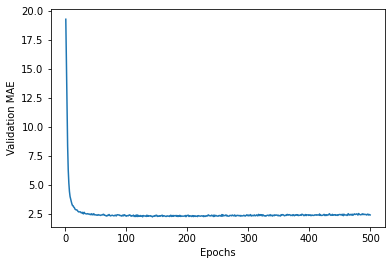

In [50]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

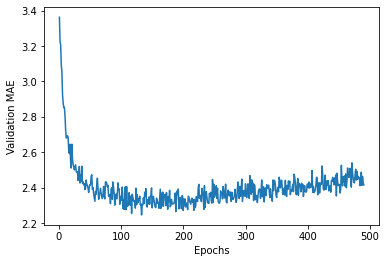

In [52]:
truncated_mae_history = average_mae_history[10:] # 剔除前10个数据点，让曲线更清晰
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [53]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 13.0919 - mae: 2.4104


In [54]:
test_mae_score

2.41037654876709

### Generating predictions on new data

In [55]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 1000us/step


array([7.8893313], dtype=float32)

### Wrapping up

## Summary